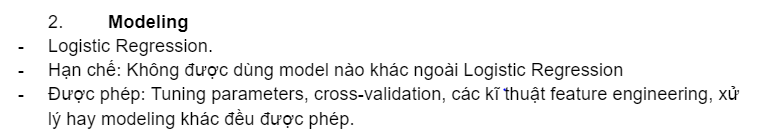

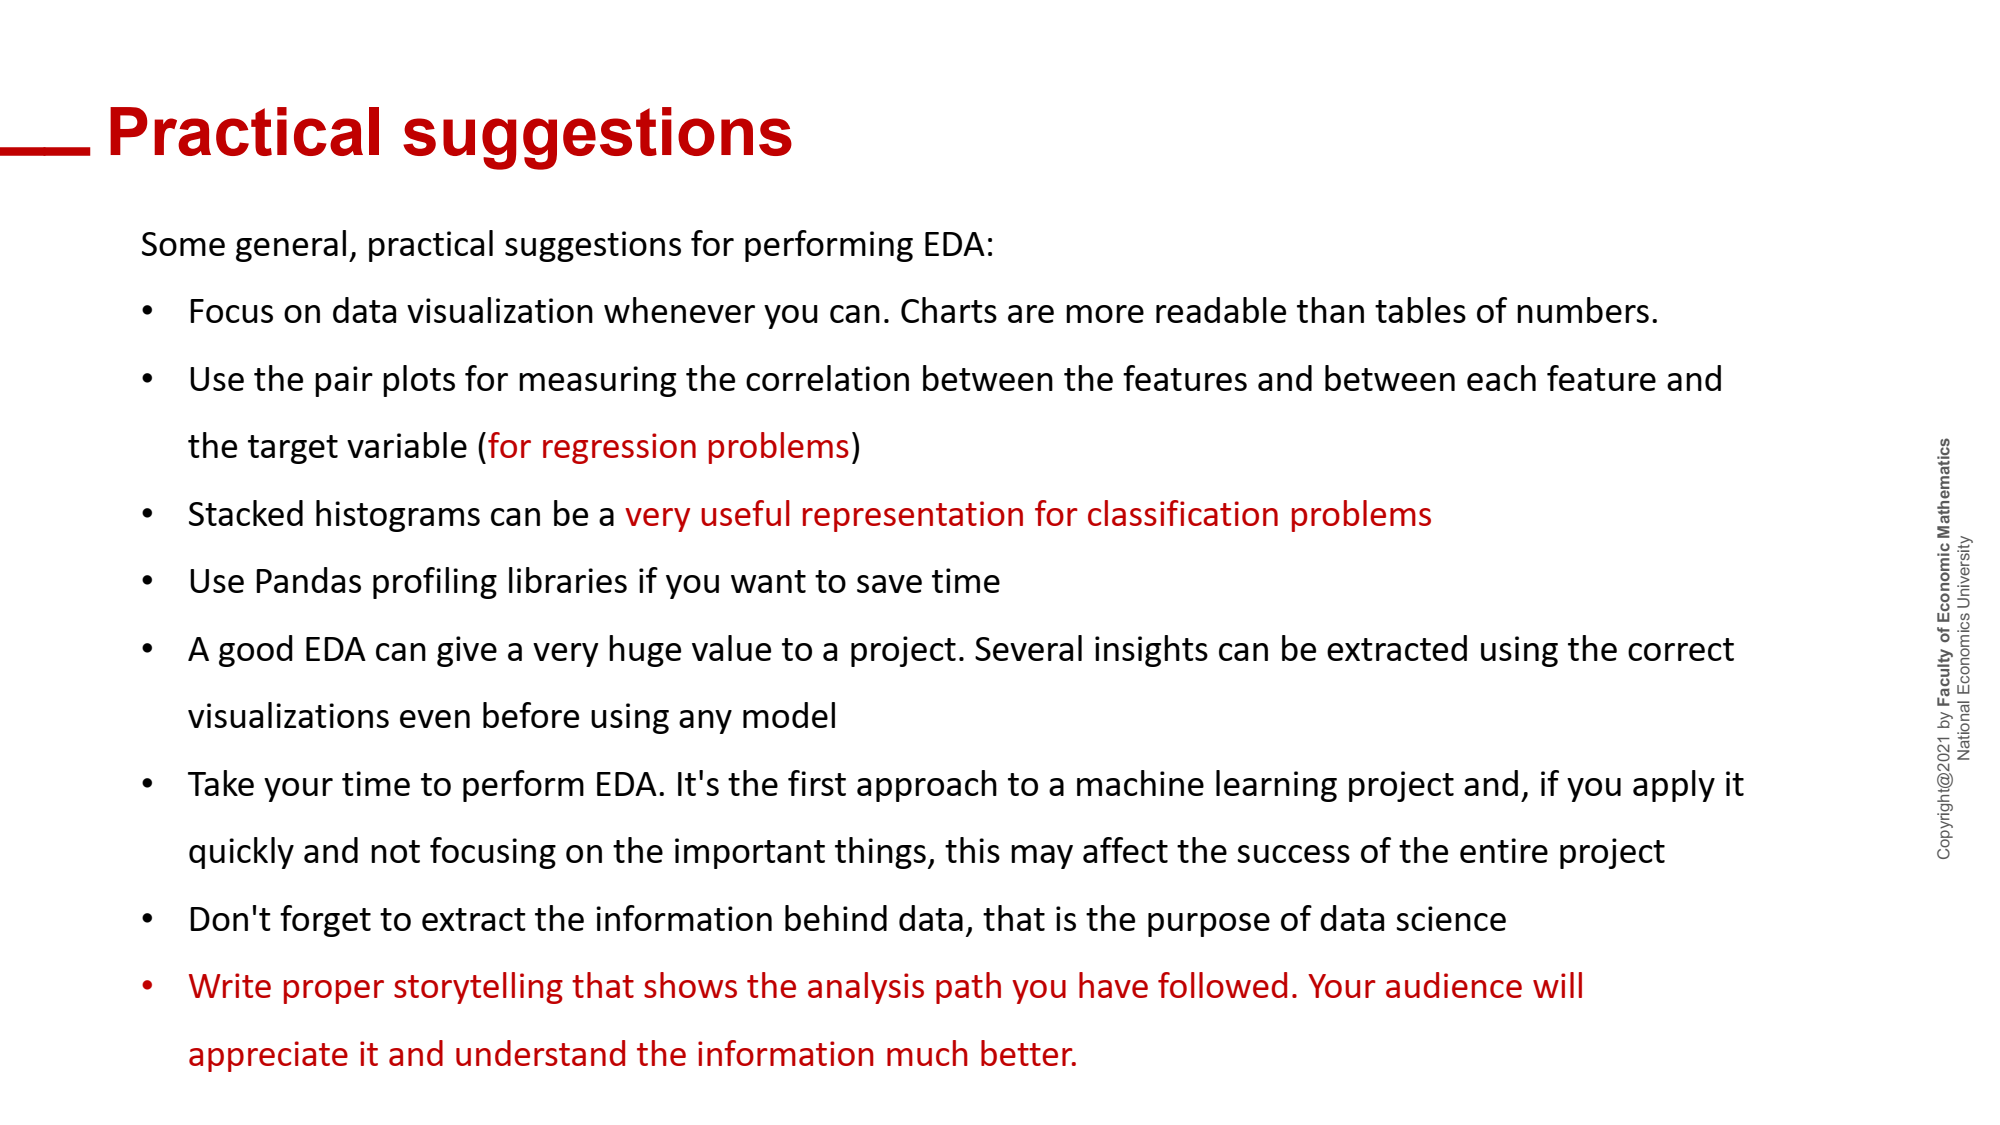

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = ['dseb63_application_test','dseb63_application_train','dseb63_bureau',\
        'dseb63_bureau_balance', 'dseb63_credit_card_balance','dseb63_installments_payments',\
        'dseb63_POS_CASH_balance','dseb63_previous_application']
link = 'D:\\Năm 3 - HK1\\Visualize\\Ex\\final_project\\dseb63_final_project_DP_dataset\\dseb63_final_project_DP_dataset\\'
df = pd.read_csv(link + file[1]+'.csv',index_col='Unnamed: 0')

In [3]:
# Logistic assumption
# data, robust

# 1 
# df2.info(verbose=True)
# % null value of each column
# unique value => other group +> imbalance
# outliner boxplot
# distribution
# 2
#correlation

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

In [5]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
count,246009.000000,246009.000000,2.460090e+05,2.460090e+05,245999.000000,2.457850e+05,246009.000000,246009.000000,246009.000000,246009.000000,...,246009.000000,246009.000000,246009.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,246009.000000
mean,0.080794,0.416229,1.684589e+05,5.996410e+05,27120.238129,5.389827e+05,0.020855,-16038.946343,63852.612441,-4985.222248,...,0.000581,0.000496,0.000309,0.006480,0.006729,0.034211,0.266647,0.266920,1.901127,153580.509542
std,0.272519,0.720664,1.045297e+05,4.030980e+05,14510.634712,3.700520e+05,0.013818,4361.265483,141306.376949,3521.391396,...,0.024103,0.022264,0.017574,0.084239,0.106693,0.204336,0.911957,0.834132,1.870269,88764.127645
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-23416.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19682.000000,-2758.000000,-7482.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76772.000000
50%,0.000000,0.000000,1.462500e+05,5.147775e+05,24903.000000,4.500000e+05,0.018850,-15755.000000,-1212.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,153390.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34654.500000,6.795000e+05,0.028663,-12418.000000,-288.000000,-2006.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,230433.000000
max,1.000000,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,27.000000,261.000000,25.000000,307510.000000


# Percentage Null values of each column

In [6]:
# f, ax = plt.subplots(figsize=(16,16))
# sns.barplot((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(60),\
#            orient='h',width=0.4,palette='ch:s=.6,r=-.2',)
# ax.spines[['right','top','bottom','left']].set_visible(False)
# ax.tick_params(left=False)
# ax.xaxis.tick_top() 
# ax.grid(axis='x')
# ax.set_title('Top 60 feature with highest percentage null values',size=15,y=1.04,x=0.4)

#drop
col_drop =  (df.isnull().sum()/df.shape[0]).sort_values(ascending=False).index[:51]
#consider 
# correl (df2.isnull().sum()/df2.shape[0]).sort_values(ascending=False).index[51:57]
col_keep = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False).index[51:]

In [7]:
# descript = pd.read_csv('D:\\Năm 3 - HK1\\Visualize\\Ex\\final_project\\dseb63_columns_description.csv',\
#                        encoding='latin',index_col='Unnamed: 0')
# info = descript[descript.Row.isin(col_drop)].iloc[:,1:3]
# des = pd.DataFrame((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).reset_index()[:51])
# des.merge(info,left_on = 'index',right_on='Row').drop(columns='index')[['Row','Description',0]]

In [8]:
# numerical_col = df.select_dtypes(include='number').columns
# f, ax =plt.subplots(27,4,figsize=(25,5*27))
# for ax, column in zip(ax.flatten(),numerical_col):    
#      sns.boxplot(df[column],ax=ax,orient='v',)  

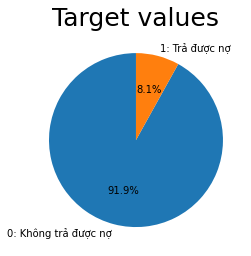

In [9]:
fig, ax = plt.subplots()
ax.pie(df["TARGET"].value_counts(normalize= True), autopct='%1.1f%%', startangle=90, labels = ['0: Không trả được nợ','1: Trả được nợ'])
plt.title('Target values',fontsize=25)
plt.show()

Text(0.5, 1.0, 'Percentage of clients provide these document')

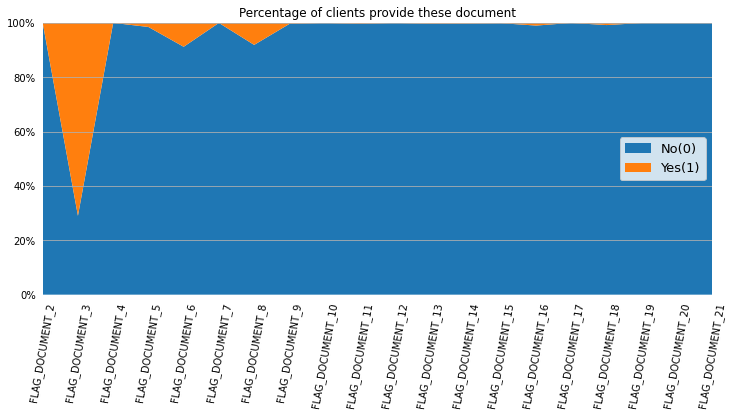

In [10]:
starting_idx = df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = df.columns.get_loc("FLAG_DOCUMENT_21")+1
a = pd.DataFrame()
for i in range(starting_idx,ending_idx):
    a[df.columns[i]] = df.iloc[:,i].value_counts(normalize=True)
f, ax = plt.subplots(figsize=(12,5))
ax.stackplot(a.columns, a.iloc[0],a.iloc[1])
ax.set_xticklabels(a.columns,rotation=80)
ax.spines[['top','bottom','right','left']].set_visible(False)
ax.set_xlim(0,19)
ax.set_ylim(0,1)
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax.tick_params(left=False,bottom=False)
ax.grid(axis='y')
ax.legend(['No(0)','Yes(1)'],fontsize=13,loc = 'center right')
ax.set_title('Percentage of clients provide these document')

In [11]:
# df.iloc[:,0].value_counts() #imbalance data
# EXT_SOURCE_1
# EXT_SOURCE_2
# EXT_SOURCE_3

# https://www.youtube.com/watch?v=yLM0FXgQmxw
# imbalance
# 'TARGET'
# 'AMT_INCOME_TOTAL'
# 'DAYS_EMPLOYED'

cols1= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL']

cols2 = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

cols3 = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

cols4 = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',\
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
cols5 = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
cols6 = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
# outliner



<AxesSubplot:>

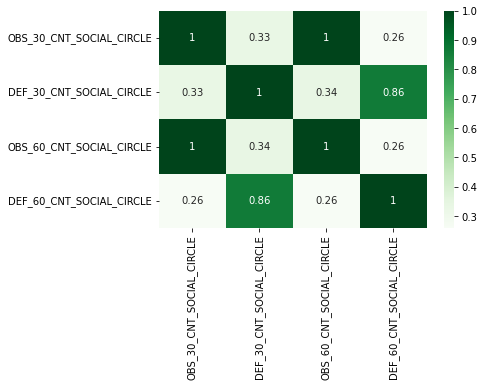

In [12]:
# consider whether social contact of clients have past due default more than N days
sns.heatmap(df[cols3].corr(),annot=True,cmap = 'Greens')
#keep 60 for genaralizing

Text(-0.1, 1.0, 'Distribution of feature OBS_60_CNT_SOCIAL_CIRCLE\n Non-defaulter                                                                          Defaulter')

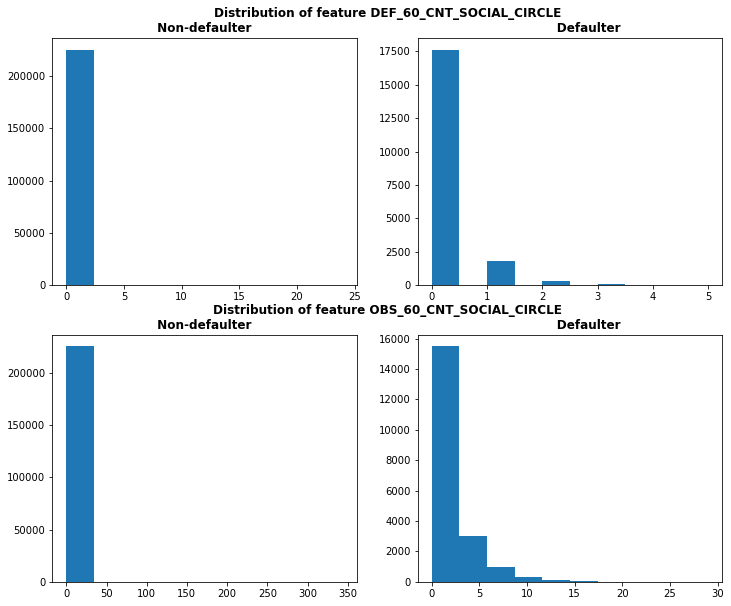

In [13]:
f, ax = plt.subplots(2,2, figsize= (12,10))
ax[0][0].hist(df[df["TARGET"] == 0]['DEF_60_CNT_SOCIAL_CIRCLE'])
ax[0][1].hist(df[df["TARGET"] == 1]['DEF_60_CNT_SOCIAL_CIRCLE'])
ax[0][1].set_title('Distribution of feature DEF_60_CNT_SOCIAL_CIRCLE\n Non-defaulter                                                                          Defaulter',fontweight='bold',x=-0.1)
ax[1][0].hist(df[df["TARGET"] == 0]['OBS_60_CNT_SOCIAL_CIRCLE'])
ax[1][1].hist(df[df["TARGET"] == 1]['OBS_60_CNT_SOCIAL_CIRCLE'])
ax[1][1].set_title('Distribution of feature OBS_60_CNT_SOCIAL_CIRCLE\n Non-defaulter                                                                          Defaulter',fontweight='bold',x=-0.1)

In [14]:
df.describe(include=["object", "category"])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,246009,246009,246009,246009,244963,246009,246009,246009,246009,168903,246009,246009,77722,122469,120829,129317
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,222491,161856,162184,170843,198742,126930,174522,157320,218389,44202,43128,54312,58964,120320,52873,127434


In [15]:
# drop col
# df[df['TARGET']==1]['FONDKAPREMONT_MODE'].hist()
# df['FONDKAPREMONT_MODE'].hist(alpha=0.3)

In [16]:
# for col in df.select_dtypes(include=['object','category']).columns:
#     print(col, "\n" ,df[col].unique())    

array([[<AxesSubplot:title={'center':'AMT_REQ_CREDIT_BUREAU_HOUR'}>,
        <AxesSubplot:title={'center':'AMT_REQ_CREDIT_BUREAU_DAY'}>,
        <AxesSubplot:title={'center':'AMT_REQ_CREDIT_BUREAU_WEEK'}>],
       [<AxesSubplot:title={'center':'AMT_REQ_CREDIT_BUREAU_MON'}>,
        <AxesSubplot:title={'center':'AMT_REQ_CREDIT_BUREAU_QRT'}>,
        <AxesSubplot:title={'center':'AMT_REQ_CREDIT_BUREAU_YEAR'}>]],
      dtype=object)

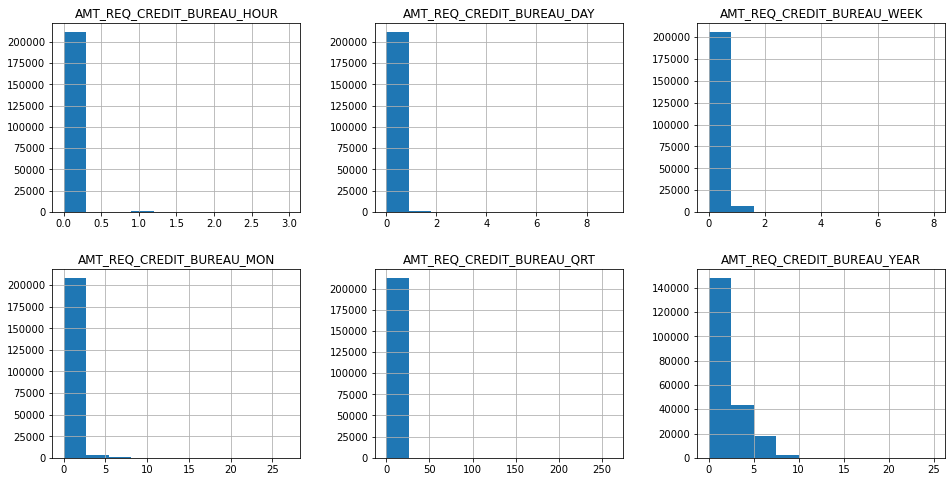

In [17]:
df[cols4].hist(figsize=(16,8),layout=(2,3))
#drop from hour to qrt

Text(-0.1, 1.0, 'Distribution of feature AMT_REQ_CREDIT_BUREAU_YEAR\n Non-defaulter                                                                          Defaulter')

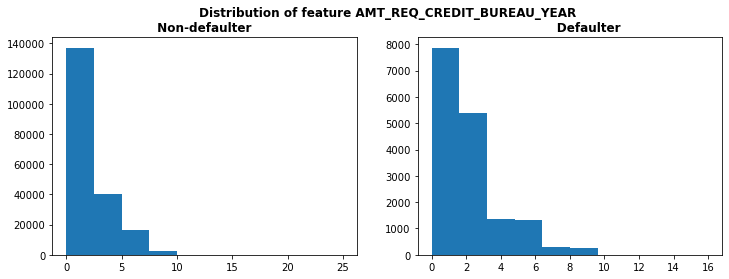

In [18]:
f, ax = plt.subplots(1,2, figsize= (12,4))
ax[0].hist(df[df["TARGET"] == 0]['AMT_REQ_CREDIT_BUREAU_YEAR'])
ax[1].hist(df[df["TARGET"] == 1]['AMT_REQ_CREDIT_BUREAU_YEAR'])
ax[1].set_title('Distribution of feature AMT_REQ_CREDIT_BUREAU_YEAR\n Non-defaulter                                                                          Defaulter',fontweight='bold',x=-0.1)

In [19]:
df[cols5].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,107484.000000,2.454800e+05,197185.000000
mean,0.502462,5.143854e-01,0.511034
std,0.210813,1.910533e-01,0.194837
min,0.014568,8.173617e-08,0.000527
25%,0.334376,3.922228e-01,0.370650
50%,0.506427,5.658916e-01,0.537070
75%,0.675074,6.637452e-01,0.669057
max,0.951624,8.549997e-01,0.896010


array([[<AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_3'}>]], dtype=object)

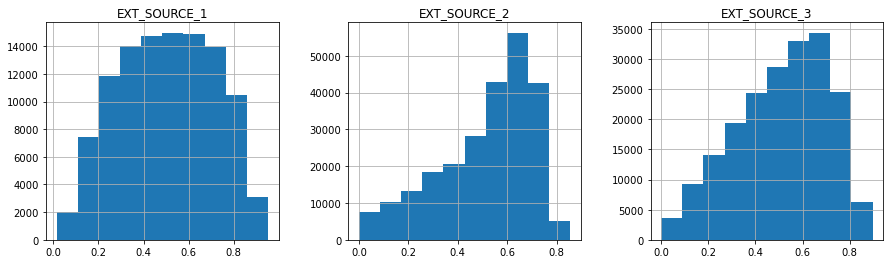

In [20]:
df[cols5].hist(layout=(1,3),figsize=(15,4))

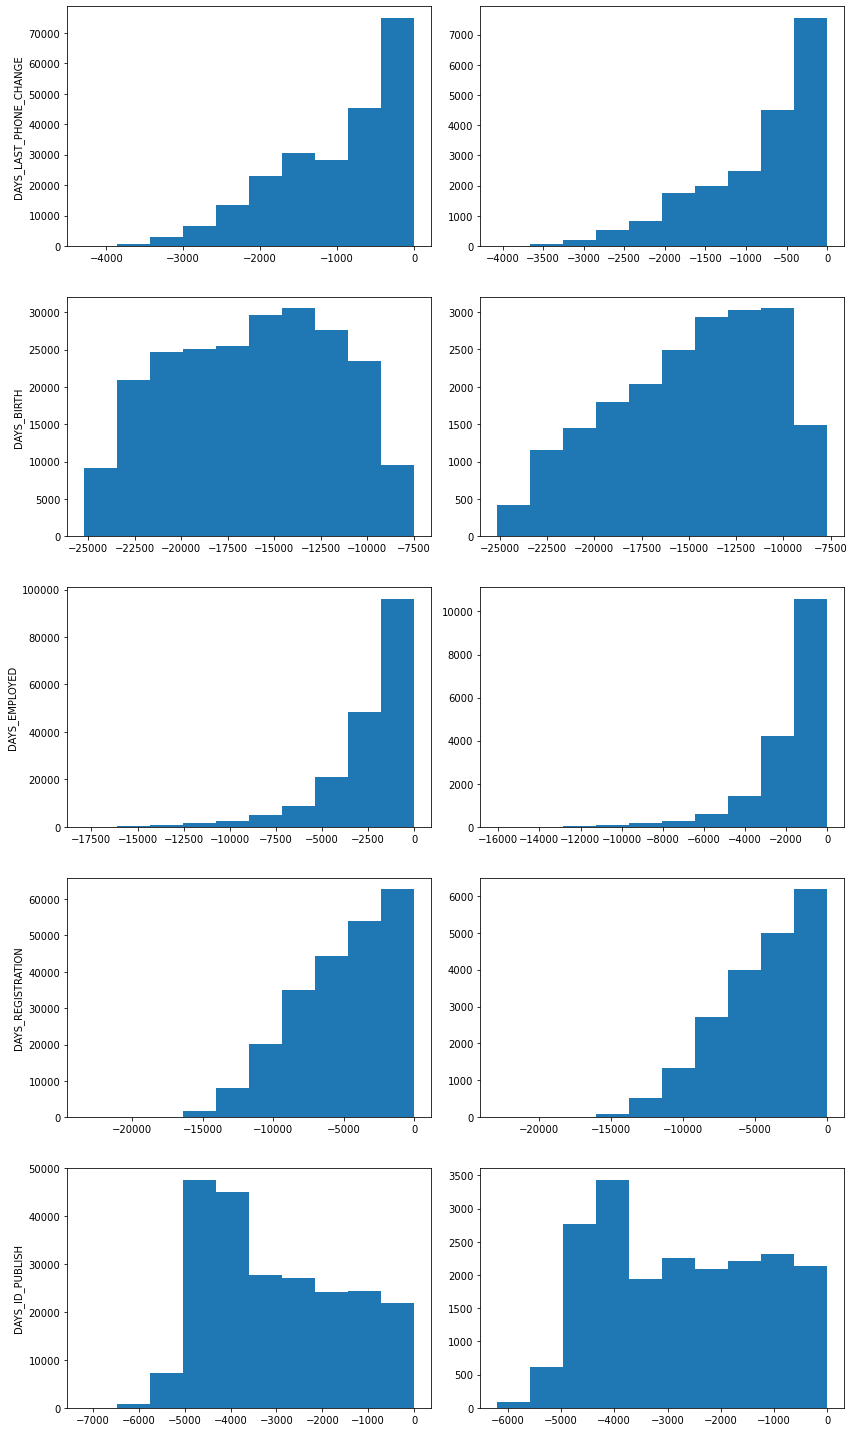

In [51]:
co = ['DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
f, ax = plt.subplots(5,2,figsize=(12,20))
for i in range(5):
    if i == 2:
        ax[i][0].hist(df[(df["TARGET"] == 0) & (df['DAYS_EMPLOYED']<365*70)][co[i]])
        ax[i][1].hist(df[(df["TARGET"] == 1) & (df['DAYS_EMPLOYED']<365*70)][co[i]])
        ax[i][0].set_ylabel(co[i])
    elif i == 1:
        ax[i][0].hist(df[(df["TARGET"] == 0) & (df['DAYS_BIRTH']<365*70)][co[i]])
        ax[i][1].hist(df[(df["TARGET"] == 1) & (df['DAYS_BIRTH']<365*70)][co[i]])
        ax[i][0].set_ylabel(co[i])
    else:
        ax[i][0].hist(df[df["TARGET"] == 0][co[i]])
        ax[i][1].hist(df[df["TARGET"] == 1][co[i]])
        ax[i][0].set_ylabel(co[i])
f.tight_layout(h_pad = 3)

# the last plot has no outliner
# negative days, outliner
# (df[df['DAYS_EMPLOYED']<(365*70)]['DAYS_EMPLOYED']/365).hist()
# visual of distribution of these feature at both target given
# the same shape may be dont have much infomation except 'DAY_BIRTH'

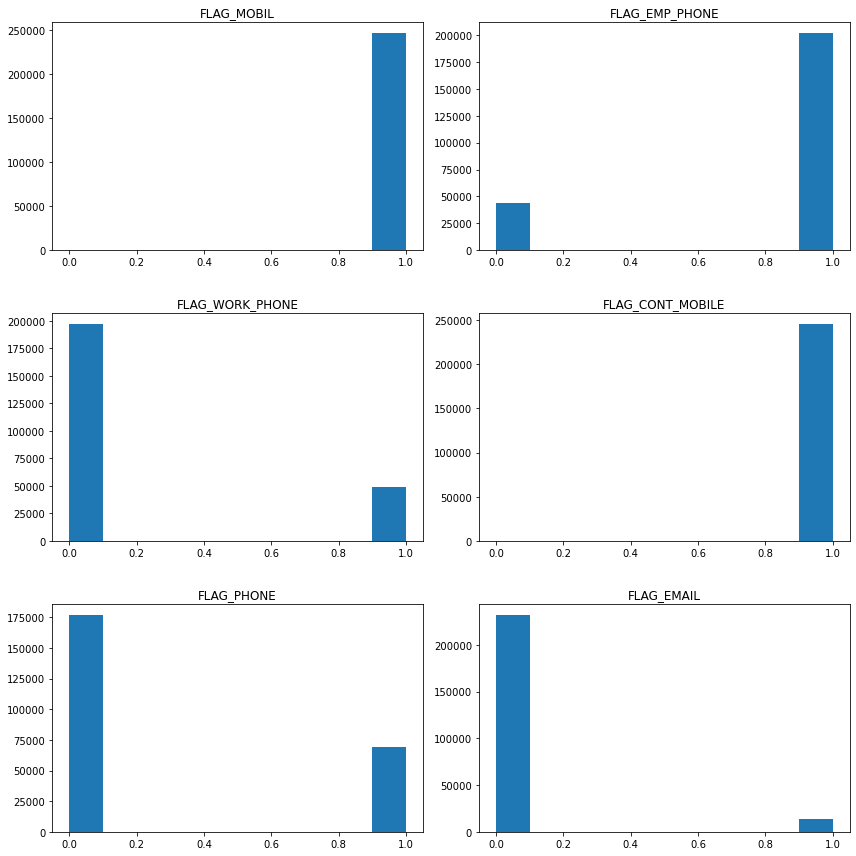

In [50]:
# contact
cols1= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
f, axes = plt.subplots(3,2,figsize= (12,12))
for ax, column in zip(axes.flatten(),cols1):    
    ax.hist(df[column])
    ax.set_title(column)
# most client have their own mobile phone, email, can be reachable,
# lets look in to emp phone, work phone and home phone
f.tight_layout(h_pad = 3)


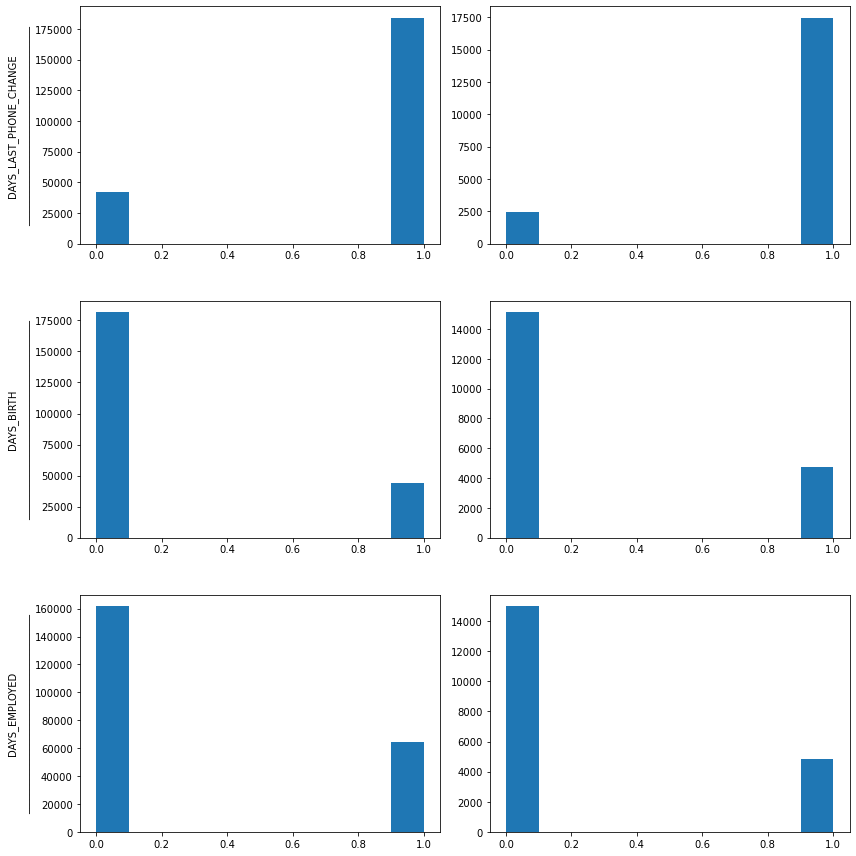

In [49]:
c = ['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE']
f, ax = plt.subplots(3,2,figsize=(12,12))
for i in range(3):
        ax[i][0].hist(df[df["TARGET"] == 0][c[i]])
        ax[i][1].hist(df[df["TARGET"] == 1][c[i]])
        ax[i][0].set_ylabel(co[i]+'\n'+'_'*40)
f.tight_layout(h_pad = 4)
# high correlation in distribution

In [52]:
pop = 'REGION_POPULATION_RELATIVE'
reg = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',\
       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

<AxesSubplot:>

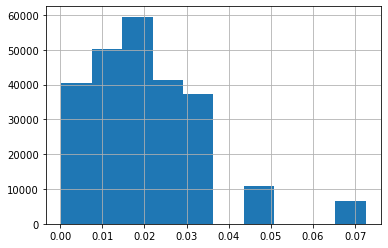

In [55]:
df[pop].hist()

(array([3600., 4061., 5538., 3188., 2689.,    0.,  527.,    0.,    0.,
         273.]),
 array([0.000533 , 0.0077305, 0.014928 , 0.0221255, 0.029323 , 0.0365205,
        0.043718 , 0.0509155, 0.058113 , 0.0653105, 0.072508 ]),
 <BarContainer object of 10 artists>)

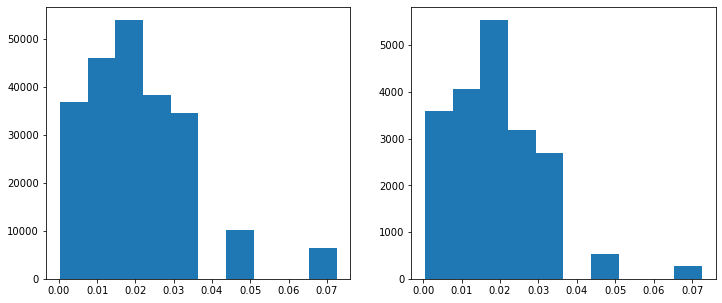

In [59]:
f, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].hist(df[df["TARGET"] == 0][pop])
ax[1].hist(df[df["TARGET"] == 1][pop])

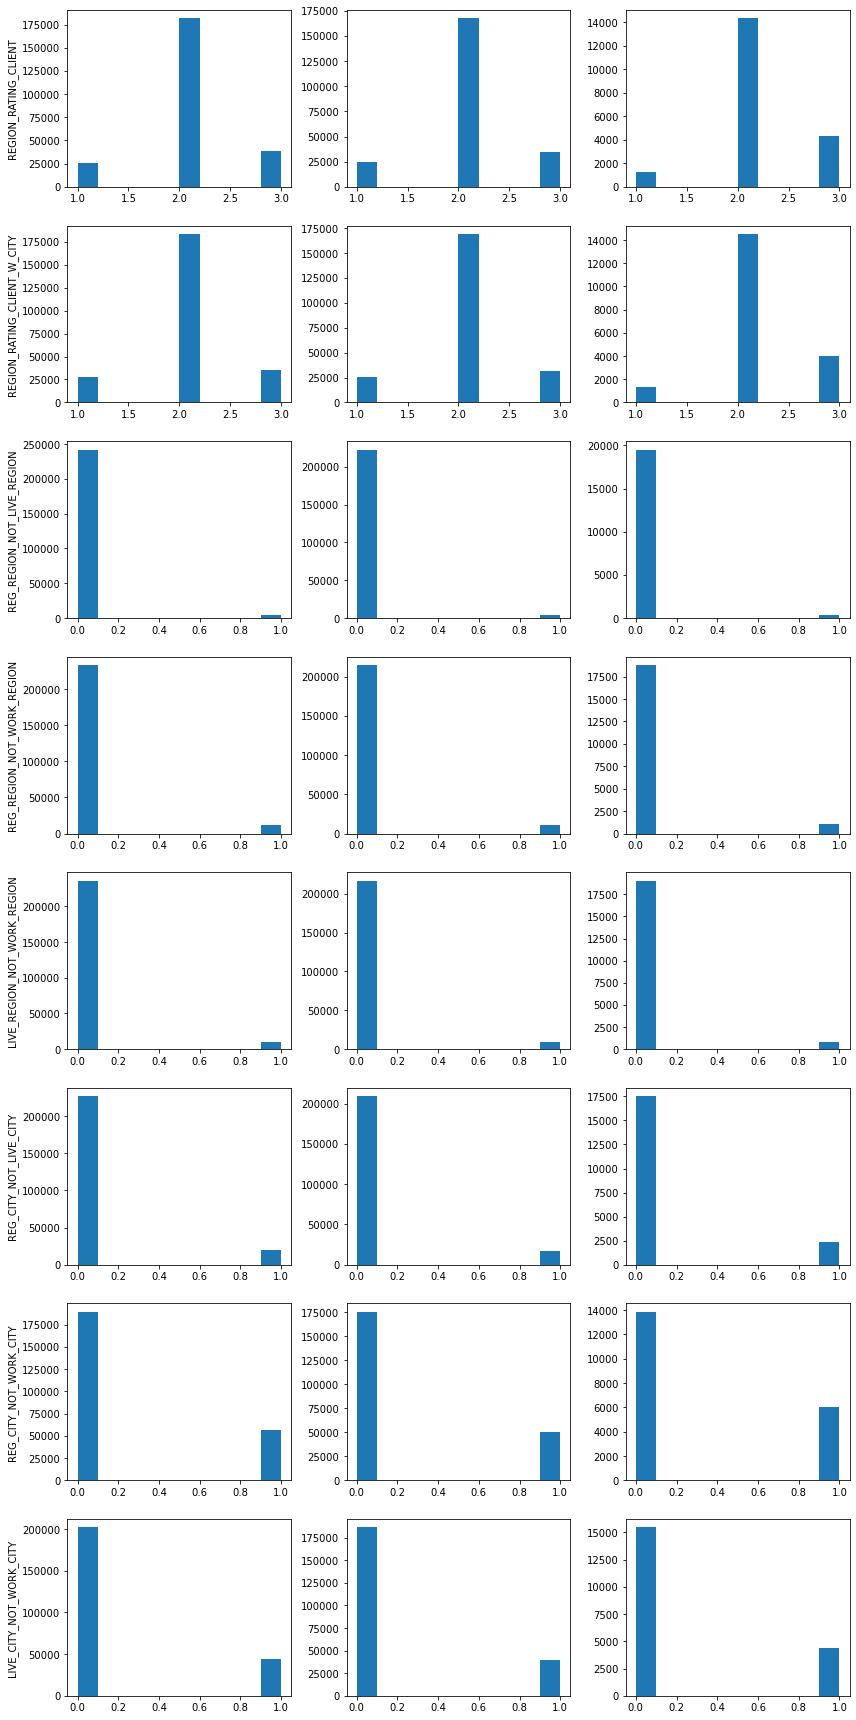

In [108]:
reg = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',\
       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
f, ax =  plt.subplots(8, 3, figsize = (12,24))
for i in range(8):
    ax[i][0].hist(df[reg[i]])
    ax[i][1].hist(df[df["TARGET"] == 0][reg[i]])
    ax[i][2].hist(df[df["TARGET"] == 1][reg[i]])
    ax[i][0].set_ylabel(reg[i])
plt.tight_layout(h_pad=2,w_pad=1)



<AxesSubplot:>

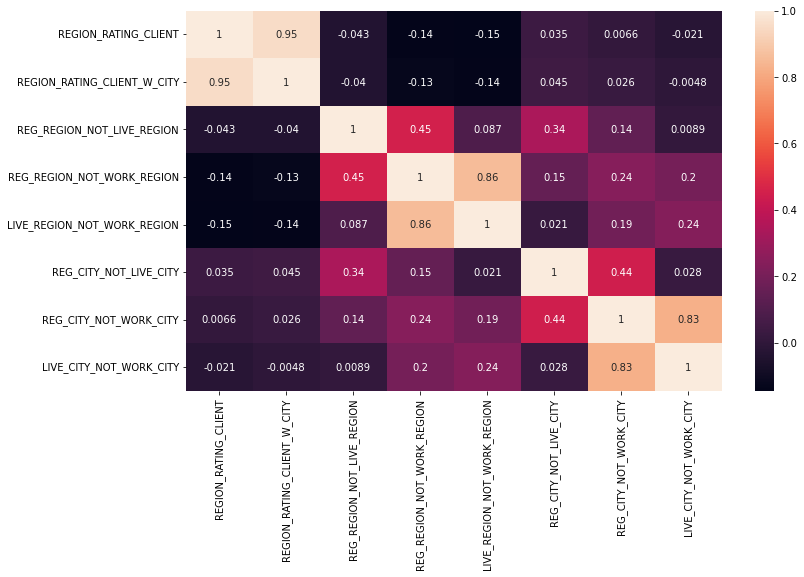

In [71]:
plt.figure(figsize=(12,7))
sns.heatmap(df[reg].corr(),annot=True)
# drop region rateing client, keep the 2nd becust is was taken into consideration
# drop 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
# drop'LIVE_REGION_NOT_WORK_REGION',REG_CITY_NOT_LIVE_CITY'
#  consider drop 'REG_CITY_NOT_WORK_CITY' or 'LIVE_CITY_NOT_WORK_CITY'

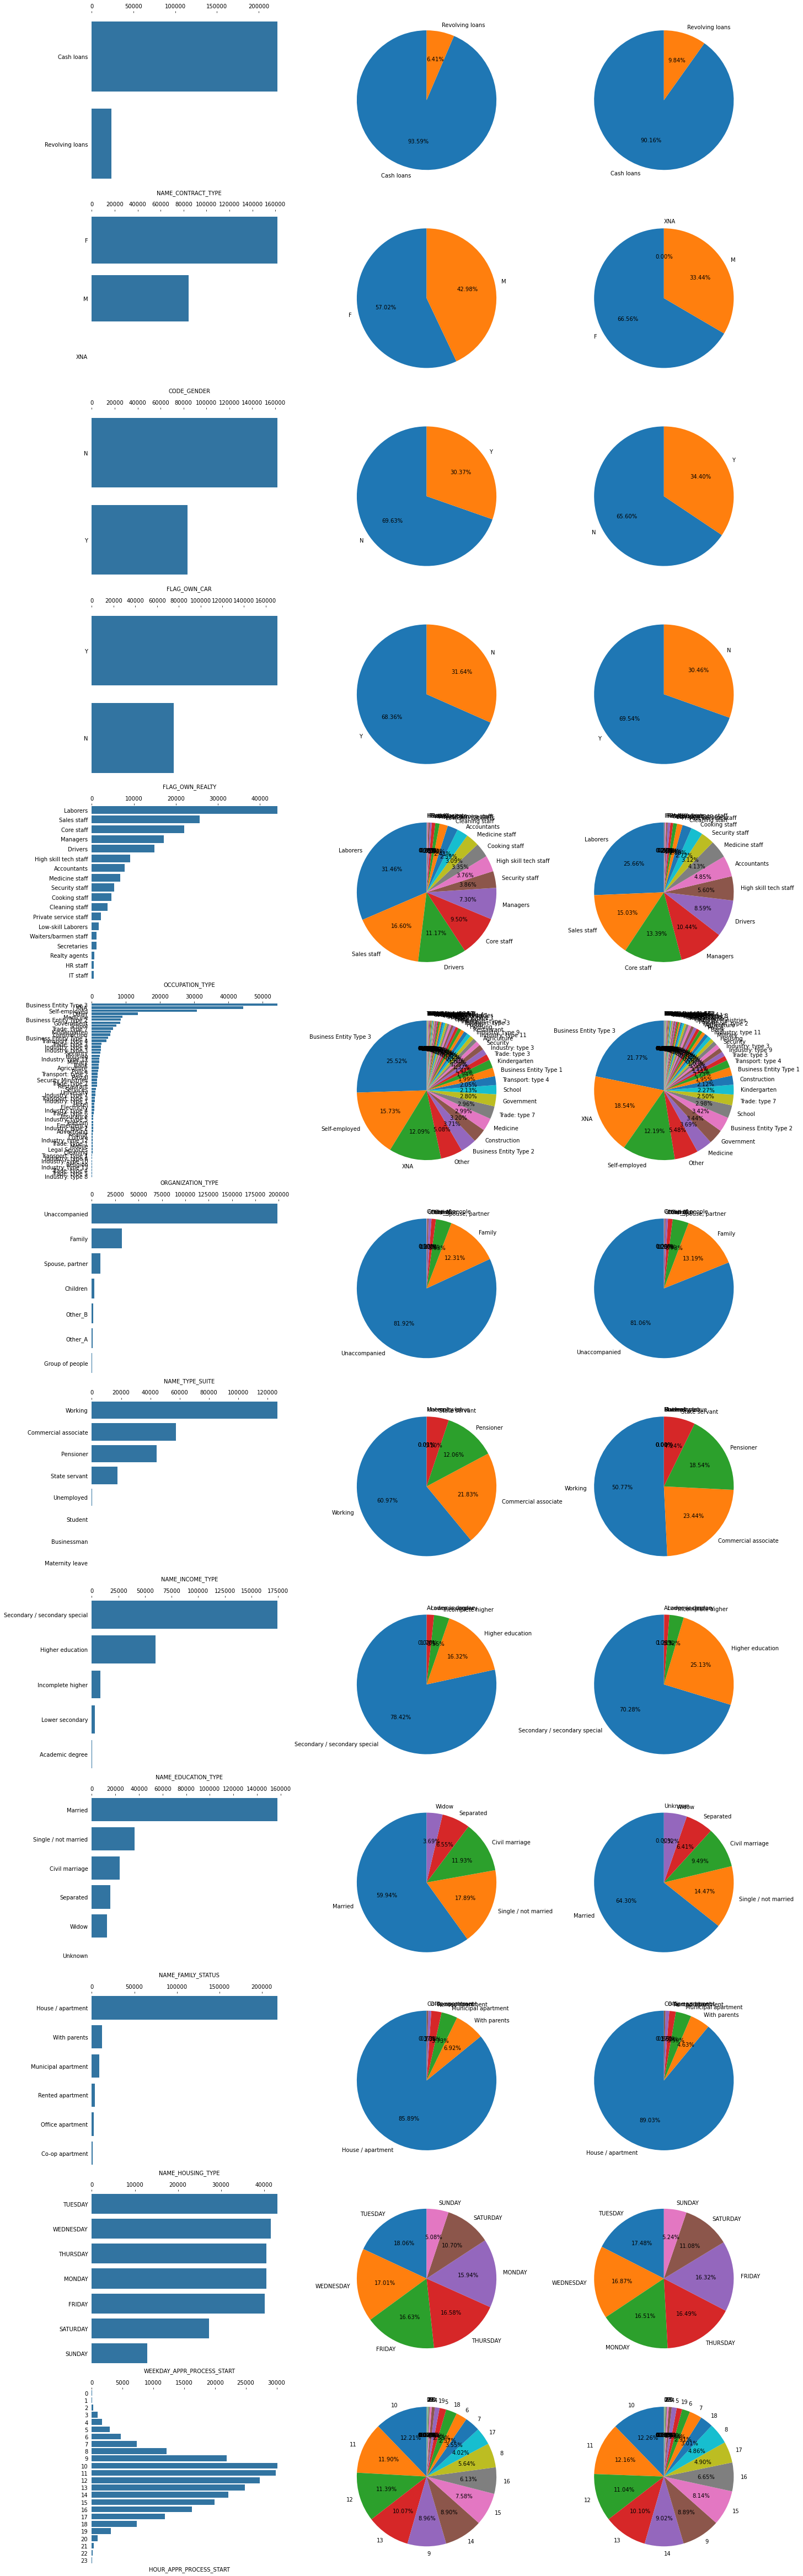

In [118]:
def visu(df,col):
    f, ax = plt.subplots(len(col),3,figsize = (5*4,5*len(col)))
    for i in range(len(col)):
        sns.barplot(df[col[i]].value_counts(),orient='h',ax=ax[i][0])
        ax[i][0].spines[['top','bottom','left','right']].set_visible(False)
        ax[i][0].tick_params(left=False)
        ax[i][0].xaxis.tick_top() 
        ax[i][1].pie(x=df[df['TARGET']==1][col[i]].value_counts(),\
       labels=df[df['TARGET']==1][col[i]].value_counts().index,\
        startangle=90,autopct='%.2f%%') #> other 
        ax[i][2].pie(x=df[df['TARGET']==0][col[i]].value_counts(),\
       labels=df[df['TARGET']==0][col[i]].value_counts().index,\
        startangle=90,autopct='%.2f%%') #> other 
    plt.tight_layout(w_pad=1)



cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',\
'OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',\
'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',\
'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']

visu(df,cols)
# ax[i][0].bar()
# sns.barplot(df['OCCUPATION_TYPE'].value_counts(),orient='h')